# 1. Import and Install Dependencies 

In [5]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image,results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right

In [5]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=1, circle_radius=1))# Draw pose connections
    
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=1)) # Draw left hand connections
    
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=1)) # Draw right

In [8]:
cap = cv2.VideoCapture(0)

#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        # Read feed
        ret,frame=cap.read()
        
        # Make detections
        image,results = mediapipe_detection(frame,holistic)
        print(results)
        
        #draw landmarks
        draw_styled_landmarks(image,results)
        
        # show to screen
        cv2.imshow('OpneCV feed',image)
        
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
frame

array([[[141, 129, 145],
        [138, 127, 143],
        [135, 126, 142],
        ...,
        [109, 104, 113],
        [110, 106, 115],
        [114, 111, 119]],

       [[139, 128, 143],
        [138, 127, 142],
        [136, 128, 142],
        ...,
        [109, 105, 114],
        [110, 107, 116],
        [114, 111, 120]],

       [[134, 128, 140],
        [134, 128, 140],
        [133, 129, 141],
        ...,
        [107, 105, 114],
        [109, 107, 117],
        [112, 110, 120]],

       ...,

       [[ 67,  83,  79],
        [ 67,  83,  79],
        [ 67,  84,  78],
        ...,
        [ 12,  26,  25],
        [  9,  22,  23],
        [  8,  21,  22]],

       [[ 68,  82,  77],
        [ 68,  82,  77],
        [ 67,  83,  76],
        ...,
        [ 11,  22,  23],
        [  8,  18,  22],
        [  6,  15,  21]],

       [[ 71,  85,  78],
        [ 71,  85,  78],
        [ 71,  85,  77],
        ...,
        [ 12,  20,  23],
        [  8,  15,  21],
        [  6,  12,  21]]

In [9]:
draw_styled_landmarks(frame,results)

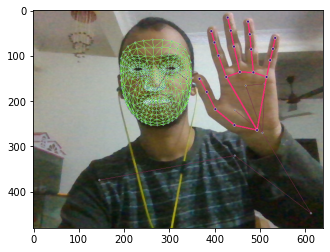

In [10]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
results.pose_landmarks

landmark {
  x: 0.43055564165115356
  y: 0.3574690520763397
  z: -0.7585707306861877
  visibility: 0.9999954700469971
}
landmark {
  x: 0.4616923928260803
  y: 0.28921082615852356
  z: -0.691428005695343
  visibility: 0.9999903440475464
}
landmark {
  x: 0.4820081293582916
  y: 0.28834936022758484
  z: -0.690779983997345
  visibility: 0.9999898672103882
}
landmark {
  x: 0.49941492080688477
  y: 0.288103848695755
  z: -0.6900640726089478
  visibility: 0.9999895095825195
}
landmark {
  x: 0.39716866612434387
  y: 0.2998443841934204
  z: -0.6994116306304932
  visibility: 0.9999901652336121
}
landmark {
  x: 0.3787151277065277
  y: 0.3041359484195709
  z: -0.6984893083572388
  visibility: 0.9999883770942688
}
landmark {
  x: 0.36400842666625977
  y: 0.3073020577430725
  z: -0.6986783146858215
  visibility: 0.9999879002571106
}
landmark {
  x: 0.529255211353302
  y: 0.31836697459220886
  z: -0.3390588164329529
  visibility: 0.9999885559082031
}
landmark {
  x: 0.35651475191116333
  y: 0.34

In [11]:
pose=[]
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [14]:
result_test = extract_keypoints(results)

In [15]:
result_test

array([ 0.45366096,  0.38852292, -0.71764052, ...,  0.        ,
        0.        ,  0.        ])

In [16]:
np.save('0',result_test)

In [17]:
np.load('0.npy')

array([ 0.45366096,  0.38852292, -0.71764052, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folder for Collection

In [18]:
# path for exported data, numy arrays
DATA_PATH = os.path.join('Generated_Data')

# Actions that we try to detect
actions = np.array(['hello','thanks','OK'])

# Thrity videos worth of data
no_sequences = 30

# Videos are going to be  30 frames in length
sequence_length = 30

In [19]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass
    

# 5. Collect Keypoint Values for Training and Testing

In [21]:
cap = cv2.VideoCapture(0)

#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
        
                # Read feed
                ret,frame=cap.read()

                # Make detections
                image,results = mediapipe_detection(frame,holistic)
                print(results)

                #draw landmarks
                draw_styled_landmarks(image,results)
                
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION',(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0),4,cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {} '.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255),1,cv2.LINE_AA)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {} '.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255),1,cv2.LINE_AA)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,action,str(sequence), str(frame_num))
                np.save(npy_path,keypoints)

                # show to screen
                cv2.imshow('OpneCV feed',image)
        
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# 6. Preprocessing Data and Create Labels and Features

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [21]:
label_map = {label:num for num, label in enumerate(actions)}

In [22]:
label_map

{'hello': 0, 'thanks': 1, 'OK': 2}

In [23]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [24]:
np.array(sequences).shape

(90, 30, 1662)

In [25]:
np.array(labels).shape

(90,)

In [26]:
x = np.array(sequences)

In [27]:
x.shape

(90, 30, 1662)

In [28]:
y = to_categorical(labels).astype(int)

In [29]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.05)

In [31]:
x_test.shape

(5, 30, 1662)

# 7. Build and Train LSTM Neural Network 

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [33]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [34]:
model = Sequential()
model.add(LSTM(64, return_sequences = True, activation = 'relu', input_shape = (30,1662)))
model.add(LSTM(128, return_sequences = True, activation = 'relu'))
model.add(LSTM(64, return_sequences = False, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(actions.shape[0], activation = 'softmax'))




In [35]:
res = [0.7,0.2,0.1]

In [36]:
actions[np.argmax(res)]

'hello'

In [37]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

In [40]:
model.fit(x_train,y_train,epochs = 2000, callbacks = [tb_callback])

Epoch 1/2000
3/3 [==============================] - 7s 556ms/step - loss: 1.1095 - categorical_accuracy: 0.3503
Epoch 2/2000
3/3 [==============================] - 0s 126ms/step - loss: 2.6326 - categorical_accuracy: 0.3014
Epoch 3/2000
3/3 [==============================] - 1s 179ms/step - loss: 4.2660 - categorical_accuracy: 0.3523
Epoch 4/2000
3/3 [==============================] - 0s 128ms/step - loss: 2.3979 - categorical_accuracy: 0.3307
Epoch 5/2000
3/3 [==============================] - 0s 155ms/step - loss: 1.0260 - categorical_accuracy: 0.3856
Epoch 6/2000
3/3 [==============================] - 0s 131ms/step - loss: 1.1350 - categorical_accuracy: 0.4305
Epoch 7/2000
3/3 [==============================] - 1s 164ms/step - loss: 1.0443 - categorical_accuracy: 0.3816
Epoch 8/2000
3/3 [==============================] - 0s 119ms/step - loss: 7.7548 - categorical_accuracy: 0.3426
Epoch 9/2000
3/3 [==============================] - 0s 127ms/step - loss: 2.0806 - categorical_accuracy:

3/3 [==============================] - 0s 114ms/step - loss: 1.1119 - categorical_accuracy: 0.2818
Epoch 74/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.1109 - categorical_accuracy: 0.2662
Epoch 75/2000
3/3 [==============================] - 0s 168ms/step - loss: 1.1095 - categorical_accuracy: 0.2584
Epoch 76/2000
3/3 [==============================] - 0s 128ms/step - loss: 1.0943 - categorical_accuracy: 0.3561
Epoch 77/2000
3/3 [==============================] - 0s 177ms/step - loss: 1.1021 - categorical_accuracy: 0.3014
Epoch 78/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.0980 - categorical_accuracy: 0.3503
Epoch 79/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.0967 - categorical_accuracy: 0.4618
Epoch 80/2000
3/3 [==============================] - 0s 114ms/step - loss: 1.0961 - categorical_accuracy: 0.3523
Epoch 81/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.0945 - categorical_accuracy: 0.36

3/3 [==============================] - 1s 177ms/step - loss: 0.7519 - categorical_accuracy: 0.7788
Epoch 146/2000
3/3 [==============================] - 0s 113ms/step - loss: 1.2130 - categorical_accuracy: 0.4756
Epoch 147/2000
3/3 [==============================] - 0s 116ms/step - loss: 1.0222 - categorical_accuracy: 0.5010
Epoch 148/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.5514 - categorical_accuracy: 0.7554
Epoch 149/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.8326 - categorical_accuracy: 0.7535
Epoch 150/2000
3/3 [==============================] - 0s 148ms/step - loss: 0.5700 - categorical_accuracy: 0.7006
Epoch 151/2000
3/3 [==============================] - 0s 154ms/step - loss: 0.4707 - categorical_accuracy: 0.8865
Epoch 152/2000
3/3 [==============================] - 0s 149ms/step - loss: 0.4564 - categorical_accuracy: 0.8415
Epoch 153/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.3717 - categorical_accura

3/3 [==============================] - 0s 107ms/step - loss: 0.1631 - categorical_accuracy: 0.9569
Epoch 218/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.5143 - categorical_accuracy: 0.8259
Epoch 219/2000
3/3 [==============================] - 0s 150ms/step - loss: 0.2994 - categorical_accuracy: 0.8904
Epoch 220/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.2387 - categorical_accuracy: 0.9472
Epoch 221/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.2168 - categorical_accuracy: 0.9550
Epoch 222/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.1743 - categorical_accuracy: 0.9472
Epoch 223/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.2782 - categorical_accuracy: 0.9022
Epoch 224/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.1251 - categorical_accuracy: 0.9667
Epoch 225/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.2074 - categorical_accura

3/3 [==============================] - 0s 111ms/step - loss: 0.0578 - categorical_accuracy: 0.9824
Epoch 289/2000
3/3 [==============================] - 1s 269ms/step - loss: 0.0616 - categorical_accuracy: 0.9648
Epoch 290/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.0332 - categorical_accuracy: 0.9902
Epoch 291/2000
3/3 [==============================] - 0s 144ms/step - loss: 0.0217 - categorical_accuracy: 0.9941
Epoch 292/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0225 - categorical_accuracy: 0.9941
Epoch 293/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.0310 - categorical_accuracy: 0.9902
Epoch 294/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.0444 - categorical_accuracy: 0.9824
Epoch 295/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.0252 - categorical_accuracy: 0.9941
Epoch 296/2000
3/3 [==============================] - 0s 154ms/step - loss: 0.0424 - categorical_accura

Epoch 360/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.0921 - categorical_accuracy: 0.3093
Epoch 361/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.0877 - categorical_accuracy: 0.3523
Epoch 362/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.0845 - categorical_accuracy: 0.3679
Epoch 363/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.0808 - categorical_accuracy: 0.3757
Epoch 364/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.0843 - categorical_accuracy: 0.3875
Epoch 365/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.0805 - categorical_accuracy: 0.4736
Epoch 366/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.0766 - categorical_accuracy: 0.5479
Epoch 367/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.0756 - categorical_accuracy: 0.5284
Epoch 368/2000
3/3 [==============================] - 0s 113ms/step - loss: 1.0710 - cat

3/3 [==============================] - 0s 112ms/step - loss: 0.3303 - categorical_accuracy: 0.9256
Epoch 432/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.1967 - categorical_accuracy: 0.9745
Epoch 433/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.3500 - categorical_accuracy: 0.8787
Epoch 434/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.2579 - categorical_accuracy: 0.9080
Epoch 435/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.2531 - categorical_accuracy: 0.9217
Epoch 436/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.2509 - categorical_accuracy: 0.9198
Epoch 437/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.1943 - categorical_accuracy: 0.9608
Epoch 438/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.3057 - categorical_accuracy: 0.8943
Epoch 439/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.3973 - categorical_accura

Epoch 503/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.1120 - categorical_accuracy: 0.9706
Epoch 504/2000
3/3 [==============================] - 0s 144ms/step - loss: 0.1474 - categorical_accuracy: 0.9472
Epoch 505/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.1144 - categorical_accuracy: 0.9628
Epoch 506/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.1112 - categorical_accuracy: 0.9530
Epoch 507/2000
3/3 [==============================] - 1s 145ms/step - loss: 0.0911 - categorical_accuracy: 0.9608
Epoch 508/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.0984 - categorical_accuracy: 0.9667
Epoch 509/2000
3/3 [==============================] - 1s 178ms/step - loss: 0.1182 - categorical_accuracy: 0.9628
Epoch 510/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.0924 - categorical_accuracy: 0.9628
Epoch 511/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.1057 - cat

3/3 [==============================] - 0s 101ms/step - loss: 0.1763 - categorical_accuracy: 0.9472
Epoch 575/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.1064 - categorical_accuracy: 0.9667
Epoch 576/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.1435 - categorical_accuracy: 0.9413
Epoch 577/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.0873 - categorical_accuracy: 0.9667
Epoch 578/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.1003 - categorical_accuracy: 0.9550
Epoch 579/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0590 - categorical_accuracy: 0.9882
Epoch 580/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.1161 - categorical_accuracy: 0.9550
Epoch 581/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.0594 - categorical_accuracy: 0.9784
Epoch 582/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.0594 - categorical_accura

3/3 [==============================] - 0s 104ms/step - loss: 0.0208 - categorical_accuracy: 0.9941
Epoch 647/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0571 - categorical_accuracy: 0.9667
Epoch 648/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0286 - categorical_accuracy: 0.9824
Epoch 649/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.1830 - categorical_accuracy: 0.9550
Epoch 650/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.0715 - categorical_accuracy: 0.9726
Epoch 651/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0760 - categorical_accuracy: 0.9628
Epoch 652/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.0566 - categorical_accuracy: 0.9824
Epoch 653/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.0465 - categorical_accuracy: 0.9824
Epoch 654/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0736 - categorical_accurac

3/3 [==============================] - 0s 110ms/step - loss: 0.0695 - categorical_accuracy: 0.9667
Epoch 719/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.0587 - categorical_accuracy: 0.9726
Epoch 720/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0774 - categorical_accuracy: 0.9726
Epoch 721/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.0455 - categorical_accuracy: 0.9843
Epoch 722/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.0649 - categorical_accuracy: 0.9550
Epoch 723/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.0616 - categorical_accuracy: 0.9902
Epoch 724/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0433 - categorical_accuracy: 0.9706
Epoch 725/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.0719 - categorical_accuracy: 0.9550
Epoch 726/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.0414 - categorical_accura

Epoch 790/2000
3/3 [==============================] - 1s 279ms/step - loss: 0.1209 - categorical_accuracy: 0.9608
Epoch 791/2000
3/3 [==============================] - 1s 281ms/step - loss: 0.3235 - categorical_accuracy: 0.8943
Epoch 792/2000
3/3 [==============================] - 1s 252ms/step - loss: 0.5575 - categorical_accuracy: 0.8396
Epoch 793/2000
3/3 [==============================] - 1s 245ms/step - loss: 0.4406 - categorical_accuracy: 0.8357
Epoch 794/2000
3/3 [==============================] - 1s 221ms/step - loss: 0.3497 - categorical_accuracy: 0.8494
Epoch 795/2000
3/3 [==============================] - 0s 154ms/step - loss: 0.2323 - categorical_accuracy: 0.9393
Epoch 796/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.1045 - categorical_accuracy: 0.9706
Epoch 797/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.1104 - categorical_accuracy: 0.9569
Epoch 798/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.0636 - cat

3/3 [==============================] - 0s 137ms/step - loss: 0.0246 - categorical_accuracy: 0.9824
Epoch 862/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.0145 - categorical_accuracy: 0.9902
Epoch 863/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.0216 - categorical_accuracy: 0.9902
Epoch 864/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.0173 - categorical_accuracy: 1.0000
Epoch 865/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.0207 - categorical_accuracy: 1.0000
Epoch 866/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.0140 - categorical_accuracy: 0.9941
Epoch 867/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.0167 - categorical_accuracy: 1.0000
Epoch 868/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.0306 - categorical_accuracy: 0.9824
Epoch 869/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.0218 - categorical_accura

Epoch 933/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.0104 - categorical_accuracy: 1.0000
Epoch 934/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.0071 - categorical_accuracy: 1.0000
Epoch 935/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.0070 - categorical_accuracy: 1.0000
Epoch 936/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.0072 - categorical_accuracy: 1.0000
Epoch 937/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.0045 - categorical_accuracy: 1.0000
Epoch 938/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.0051 - categorical_accuracy: 1.0000
Epoch 939/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.0054 - categorical_accuracy: 1.0000
Epoch 940/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 941/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.0025 - cat

3/3 [==============================] - 0s 128ms/step - loss: 2.7017e-04 - categorical_accuracy: 1.0000
Epoch 1004/2000
3/3 [==============================] - 0s 115ms/step - loss: 3.7324e-04 - categorical_accuracy: 1.0000
Epoch 1005/2000
3/3 [==============================] - 0s 121ms/step - loss: 3.9499e-04 - categorical_accuracy: 1.0000
Epoch 1006/2000
3/3 [==============================] - 0s 125ms/step - loss: 3.6390e-04 - categorical_accuracy: 1.0000
Epoch 1007/2000
3/3 [==============================] - 0s 116ms/step - loss: 2.9087e-04 - categorical_accuracy: 1.0000
Epoch 1008/2000
3/3 [==============================] - 0s 119ms/step - loss: 3.7431e-04 - categorical_accuracy: 1.0000
Epoch 1009/2000
3/3 [==============================] - 0s 121ms/step - loss: 3.0612e-04 - categorical_accuracy: 1.0000
Epoch 1010/2000
3/3 [==============================] - 0s 115ms/step - loss: 3.5718e-04 - categorical_accuracy: 1.0000
Epoch 1011/2000
3/3 [==============================] - 0s 128ms/

Epoch 1072/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.3631e-04 - categorical_accuracy: 1.0000
Epoch 1073/2000
3/3 [==============================] - 0s 113ms/step - loss: 1.9066e-04 - categorical_accuracy: 1.0000
Epoch 1074/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.5228e-04 - categorical_accuracy: 1.0000
Epoch 1075/2000
3/3 [==============================] - 0s 114ms/step - loss: 1.6953e-04 - categorical_accuracy: 1.0000
Epoch 1076/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.7426e-04 - categorical_accuracy: 1.0000
Epoch 1077/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.2137e-04 - categorical_accuracy: 1.0000
Epoch 1078/2000
3/3 [==============================] - 0s 114ms/step - loss: 1.0939e-04 - categorical_accuracy: 1.0000
Epoch 1079/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.2988e-04 - categorical_accuracy: 1.0000
Epoch 1080/2000
3/3 [===========================

3/3 [==============================] - 0s 120ms/step - loss: 7.4435e-05 - categorical_accuracy: 1.0000
Epoch 1141/2000
3/3 [==============================] - 0s 113ms/step - loss: 7.6702e-05 - categorical_accuracy: 1.0000
Epoch 1142/2000
3/3 [==============================] - 0s 116ms/step - loss: 9.7376e-05 - categorical_accuracy: 1.0000
Epoch 1143/2000
3/3 [==============================] - 0s 105ms/step - loss: 8.1411e-05 - categorical_accuracy: 1.0000
Epoch 1144/2000
3/3 [==============================] - 0s 118ms/step - loss: 7.3305e-05 - categorical_accuracy: 1.0000
Epoch 1145/2000
3/3 [==============================] - 0s 121ms/step - loss: 7.8101e-05 - categorical_accuracy: 1.0000
Epoch 1146/2000
3/3 [==============================] - 0s 124ms/step - loss: 8.0739e-05 - categorical_accuracy: 1.0000
Epoch 1147/2000
3/3 [==============================] - 0s 119ms/step - loss: 9.3349e-05 - categorical_accuracy: 1.0000
Epoch 1148/2000
3/3 [==============================] - 0s 113ms/

Epoch 1209/2000
3/3 [==============================] - 0s 116ms/step - loss: 3.8862e-05 - categorical_accuracy: 1.0000
Epoch 1210/2000
3/3 [==============================] - 0s 115ms/step - loss: 5.5772e-05 - categorical_accuracy: 1.0000
Epoch 1211/2000
3/3 [==============================] - 0s 120ms/step - loss: 3.8633e-05 - categorical_accuracy: 1.0000
Epoch 1212/2000
3/3 [==============================] - 0s 119ms/step - loss: 6.3802e-05 - categorical_accuracy: 1.0000
Epoch 1213/2000
3/3 [==============================] - 0s 123ms/step - loss: 4.1955e-05 - categorical_accuracy: 1.0000
Epoch 1214/2000
3/3 [==============================] - 0s 117ms/step - loss: 5.6020e-05 - categorical_accuracy: 1.0000
Epoch 1215/2000
3/3 [==============================] - 0s 123ms/step - loss: 5.0323e-05 - categorical_accuracy: 1.0000
Epoch 1216/2000
3/3 [==============================] - 0s 117ms/step - loss: 4.5994e-05 - categorical_accuracy: 1.0000
Epoch 1217/2000
3/3 [===========================

3/3 [==============================] - 1s 194ms/step - loss: 3.3566e-05 - categorical_accuracy: 1.0000
Epoch 1278/2000
3/3 [==============================] - 1s 177ms/step - loss: 4.2618e-05 - categorical_accuracy: 1.0000
Epoch 1279/2000
3/3 [==============================] - 0s 135ms/step - loss: 4.7235e-05 - categorical_accuracy: 1.0000
Epoch 1280/2000
3/3 [==============================] - 0s 140ms/step - loss: 3.4944e-05 - categorical_accuracy: 1.0000
Epoch 1281/2000
3/3 [==============================] - 0s 114ms/step - loss: 2.8818e-05 - categorical_accuracy: 1.0000
Epoch 1282/2000
3/3 [==============================] - 0s 126ms/step - loss: 3.4901e-05 - categorical_accuracy: 1.0000
Epoch 1283/2000
3/3 [==============================] - 0s 125ms/step - loss: 2.8169e-05 - categorical_accuracy: 1.0000
Epoch 1284/2000
3/3 [==============================] - 0s 122ms/step - loss: 4.0162e-05 - categorical_accuracy: 1.0000
Epoch 1285/2000
3/3 [==============================] - 0s 128ms/

Epoch 1346/2000
3/3 [==============================] - 0s 131ms/step - loss: 2.5910e-05 - categorical_accuracy: 1.0000
Epoch 1347/2000
3/3 [==============================] - 0s 116ms/step - loss: 2.5784e-05 - categorical_accuracy: 1.0000
Epoch 1348/2000
3/3 [==============================] - 0s 119ms/step - loss: 3.1824e-05 - categorical_accuracy: 1.0000
Epoch 1349/2000
3/3 [==============================] - 0s 118ms/step - loss: 2.7662e-05 - categorical_accuracy: 1.0000
Epoch 1350/2000
3/3 [==============================] - 0s 120ms/step - loss: 2.4541e-05 - categorical_accuracy: 1.0000
Epoch 1351/2000
3/3 [==============================] - 0s 128ms/step - loss: 2.5478e-05 - categorical_accuracy: 1.0000
Epoch 1352/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.8949e-05 - categorical_accuracy: 1.0000
Epoch 1353/2000
3/3 [==============================] - 0s 121ms/step - loss: 2.3344e-05 - categorical_accuracy: 1.0000
Epoch 1354/2000
3/3 [===========================

3/3 [==============================] - 0s 121ms/step - loss: 1.2787e-05 - categorical_accuracy: 1.0000
Epoch 1415/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.3068e-05 - categorical_accuracy: 1.0000
Epoch 1416/2000
3/3 [==============================] - 0s 113ms/step - loss: 1.2364e-05 - categorical_accuracy: 1.0000
Epoch 1417/2000
3/3 [==============================] - 0s 126ms/step - loss: 1.5926e-05 - categorical_accuracy: 1.0000
Epoch 1418/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.2329e-05 - categorical_accuracy: 1.0000
Epoch 1419/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.7731e-05 - categorical_accuracy: 1.0000
Epoch 1420/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.4895e-05 - categorical_accuracy: 1.0000
Epoch 1421/2000
3/3 [==============================] - 0s 124ms/step - loss: 1.6130e-05 - categorical_accuracy: 1.0000
Epoch 1422/2000
3/3 [==============================] - 0s 114ms/

Epoch 1483/2000
3/3 [==============================] - 0s 120ms/step - loss: 8.8047e-06 - categorical_accuracy: 1.0000
Epoch 1484/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.0071e-05 - categorical_accuracy: 1.0000
Epoch 1485/2000
3/3 [==============================] - 0s 119ms/step - loss: 8.4772e-06 - categorical_accuracy: 1.0000
Epoch 1486/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.0135e-05 - categorical_accuracy: 1.0000
Epoch 1487/2000
3/3 [==============================] - 0s 114ms/step - loss: 8.8506e-06 - categorical_accuracy: 1.0000
Epoch 1488/2000
3/3 [==============================] - 0s 118ms/step - loss: 6.6416e-06 - categorical_accuracy: 1.0000
Epoch 1489/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.0559e-05 - categorical_accuracy: 1.0000
Epoch 1490/2000
3/3 [==============================] - 0s 117ms/step - loss: 6.6462e-06 - categorical_accuracy: 1.0000
Epoch 1491/2000
3/3 [===========================

3/3 [==============================] - 0s 141ms/step - loss: 4.5803e-06 - categorical_accuracy: 1.0000
Epoch 1552/2000
3/3 [==============================] - 0s 124ms/step - loss: 4.7272e-06 - categorical_accuracy: 1.0000
Epoch 1553/2000
3/3 [==============================] - 0s 121ms/step - loss: 6.4259e-06 - categorical_accuracy: 1.0000
Epoch 1554/2000
3/3 [==============================] - 0s 119ms/step - loss: 5.0367e-06 - categorical_accuracy: 1.0000
Epoch 1555/2000
3/3 [==============================] - 0s 130ms/step - loss: 4.0879e-06 - categorical_accuracy: 1.0000
Epoch 1556/2000
3/3 [==============================] - 0s 124ms/step - loss: 3.0397e-06 - categorical_accuracy: 1.0000
Epoch 1557/2000
3/3 [==============================] - 0s 107ms/step - loss: 4.4256e-06 - categorical_accuracy: 1.0000
Epoch 1558/2000
3/3 [==============================] - 0s 121ms/step - loss: 6.6011e-06 - categorical_accuracy: 1.0000
Epoch 1559/2000
3/3 [==============================] - 0s 118ms/

Epoch 1620/2000
3/3 [==============================] - 0s 118ms/step - loss: 3.2463e-06 - categorical_accuracy: 1.0000
Epoch 1621/2000
3/3 [==============================] - 0s 119ms/step - loss: 2.7823e-06 - categorical_accuracy: 1.0000
Epoch 1622/2000
3/3 [==============================] - 0s 123ms/step - loss: 2.9929e-06 - categorical_accuracy: 1.0000
Epoch 1623/2000
3/3 [==============================] - 0s 119ms/step - loss: 2.4227e-06 - categorical_accuracy: 1.0000
Epoch 1624/2000
3/3 [==============================] - 0s 118ms/step - loss: 5.0125e-06 - categorical_accuracy: 1.0000
Epoch 1625/2000
3/3 [==============================] - 0s 122ms/step - loss: 4.9806e-06 - categorical_accuracy: 1.0000
Epoch 1626/2000
3/3 [==============================] - 0s 120ms/step - loss: 3.1550e-06 - categorical_accuracy: 1.0000
Epoch 1627/2000
3/3 [==============================] - 0s 118ms/step - loss: 4.9288e-06 - categorical_accuracy: 1.0000
Epoch 1628/2000
3/3 [===========================

3/3 [==============================] - 0s 117ms/step - loss: 2.4151e-06 - categorical_accuracy: 1.0000
Epoch 1689/2000
3/3 [==============================] - 0s 121ms/step - loss: 2.1883e-06 - categorical_accuracy: 1.0000
Epoch 1690/2000
3/3 [==============================] - 0s 116ms/step - loss: 2.0823e-06 - categorical_accuracy: 1.0000
Epoch 1691/2000
3/3 [==============================] - 0s 122ms/step - loss: 2.3510e-06 - categorical_accuracy: 1.0000
Epoch 1692/2000
3/3 [==============================] - 0s 132ms/step - loss: 2.2741e-06 - categorical_accuracy: 1.0000
Epoch 1693/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.7638e-06 - categorical_accuracy: 1.0000
Epoch 1694/2000
3/3 [==============================] - 0s 121ms/step - loss: 2.9770e-06 - categorical_accuracy: 1.0000
Epoch 1695/2000
3/3 [==============================] - 0s 120ms/step - loss: 3.1050e-06 - categorical_accuracy: 1.0000
Epoch 1696/2000
3/3 [==============================] - 0s 124ms/

Epoch 1757/2000
3/3 [==============================] - 1s 149ms/step - loss: 2.1122e-06 - categorical_accuracy: 1.0000
Epoch 1758/2000
3/3 [==============================] - 0s 133ms/step - loss: 2.5250e-06 - categorical_accuracy: 1.0000
Epoch 1759/2000
3/3 [==============================] - 0s 127ms/step - loss: 2.4414e-06 - categorical_accuracy: 1.0000
Epoch 1760/2000
3/3 [==============================] - 0s 122ms/step - loss: 2.0663e-06 - categorical_accuracy: 1.0000
Epoch 1761/2000
3/3 [==============================] - 0s 126ms/step - loss: 1.2921e-06 - categorical_accuracy: 1.0000
Epoch 1762/2000
3/3 [==============================] - 0s 124ms/step - loss: 1.6651e-06 - categorical_accuracy: 1.0000
Epoch 1763/2000
3/3 [==============================] - 0s 132ms/step - loss: 1.5712e-06 - categorical_accuracy: 1.0000
Epoch 1764/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.9808e-06 - categorical_accuracy: 1.0000
Epoch 1765/2000
3/3 [===========================

3/3 [==============================] - 0s 126ms/step - loss: 1.6566e-06 - categorical_accuracy: 1.0000
Epoch 1826/2000
3/3 [==============================] - 0s 124ms/step - loss: 1.8784e-06 - categorical_accuracy: 1.0000
Epoch 1827/2000
3/3 [==============================] - 0s 114ms/step - loss: 1.6102e-06 - categorical_accuracy: 1.0000
Epoch 1828/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.6044e-06 - categorical_accuracy: 1.0000
Epoch 1829/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.7890e-06 - categorical_accuracy: 1.0000
Epoch 1830/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.3273e-06 - categorical_accuracy: 1.0000
Epoch 1831/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.5354e-06 - categorical_accuracy: 1.0000
Epoch 1832/2000
3/3 [==============================] - 0s 121ms/step - loss: 9.5825e-07 - categorical_accuracy: 1.0000
Epoch 1833/2000
3/3 [==============================] - 0s 126ms/

Epoch 1894/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.2242e-06 - categorical_accuracy: 1.0000
Epoch 1895/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.3905e-06 - categorical_accuracy: 1.0000
Epoch 1896/2000
3/3 [==============================] - 0s 130ms/step - loss: 1.4256e-06 - categorical_accuracy: 1.0000
Epoch 1897/2000
3/3 [==============================] - 0s 121ms/step - loss: 8.8917e-07 - categorical_accuracy: 1.0000
Epoch 1898/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.0761e-06 - categorical_accuracy: 1.0000
Epoch 1899/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.3245e-06 - categorical_accuracy: 1.0000
Epoch 1900/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.0712e-06 - categorical_accuracy: 1.0000
Epoch 1901/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.0803e-06 - categorical_accuracy: 1.0000
Epoch 1902/2000
3/3 [===========================

3/3 [==============================] - 0s 129ms/step - loss: 1.0790e-06 - categorical_accuracy: 1.0000
Epoch 1963/2000
3/3 [==============================] - 0s 132ms/step - loss: 7.8211e-07 - categorical_accuracy: 1.0000
Epoch 1964/2000
3/3 [==============================] - 0s 121ms/step - loss: 7.2018e-07 - categorical_accuracy: 1.0000
Epoch 1965/2000
3/3 [==============================] - 0s 125ms/step - loss: 9.9771e-07 - categorical_accuracy: 1.0000
Epoch 1966/2000
3/3 [==============================] - 0s 149ms/step - loss: 9.5276e-07 - categorical_accuracy: 1.0000
Epoch 1967/2000
3/3 [==============================] - 0s 125ms/step - loss: 7.3647e-07 - categorical_accuracy: 1.0000
Epoch 1968/2000
3/3 [==============================] - 0s 125ms/step - loss: 7.5671e-07 - categorical_accuracy: 1.0000
Epoch 1969/2000
3/3 [==============================] - 0s 123ms/step - loss: 7.2433e-07 - categorical_accuracy: 1.0000
Epoch 1970/2000
3/3 [==============================] - 0s 125ms/

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# Make Predictions

In [38]:
res = model.predict(x_test)

In [46]:
actions[np.argmax(res[0])]

'OK'

In [45]:
actions[np.argmax(y_test[2])]

'hello'

In [47]:
y_test

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0]])

# 9. Save Weights

In [51]:
model.save('action.h5')

In [52]:
del model

In [48]:
model.load_weights('action.h5')

# 10. Evaluation using  Confusion Matrix and Accuracy

In [49]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [50]:
yhat = model.predict(x_test)

In [51]:
ytrue = np.argmax(y_test,axis = 1).tolist()
yhat = np.argmax(yhat,axis = 1).tolist()

In [52]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[2, 0],
        [0, 3]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [53]:
accuracy_score(ytrue,yhat)

1.0

# 11. Test in Real Time

In [54]:

sequence = []
sentence = []
thresold = 0.4


cap = cv2.VideoCapture(0)

#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        # Read feed
        ret,frame=cap.read()
        
        # Make detections
        image,results = mediapipe_detection(frame,holistic)
        print(results)
        
        #draw landmarks
        draw_styled_landmarks(image,results)
        
        #prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis = 0))[0]
            print(actions[np.argmax(res)])
        
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                if res[np.argmax(res)] > threshold:

                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        # show to screen
        cv2.imshow('OpneCV feed',image)
        
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

NameError: name 'predictions' is not defined